In [6]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [7]:
from langchain.chat_models import init_chat_model

In [8]:
model_id="gemini-2.5-flash-preview-05-20"
llm = init_chat_model(model=model_id,  model_provider="google_vertexai")

In [22]:
from langchain_core.runnables import RunnableConfig
config = RunnableConfig()
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = llm.invoke(input = state['messages'],config=config)
    return state

In [23]:
graph_builder = StateGraph(MessagesState)
graph_builder.add_node("llm", call_model)
graph_builder.add_edge(START, "llm")
graph_builder.add_edge("llm", END)
graph = graph_builder.compile()

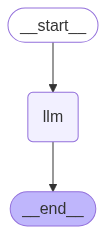

In [24]:
from utils import draw_graph
draw_graph(graph)

In [25]:
from langchain_core.messages import SystemMessage, HumanMessage

messages = [
    SystemMessage("You are an helpful assistant"),
    HumanMessage("I would like to know about democracy")

]
result = graph.invoke({"messages": messages})

In [26]:
result['messages']

[SystemMessage(content='You are an helpful assistant', additional_kwargs={}, response_metadata={}, id='47564907-c12c-4c6c-a0a1-8e01bee178de'),
 HumanMessage(content='I would like to know about democracy', additional_kwargs={}, response_metadata={}, id='e94a7b53-c806-4fed-99c5-93062b7212e7'),
 AIMessage(content='Democracy is a fascinating and complex concept, often described as a system of government where the **people hold the power**. It\'s derived from the Greek words "demos" (people) and "kratos" (rule), literally meaning "rule by the people."\n\nHere\'s a breakdown of its key aspects:\n\n## Core Principles of Democracy:\n\n1.  **Popular Sovereignty:** The ultimate source of authority is the will of the people. Government legitimacy comes from the consent of the governed.\n2.  **Equality:** All citizens are equal before the law, regardless of race, religion, gender, or social status. It also implies equal opportunity (though often an ideal rather than a reality).\n3.  **Liberty/Free

In [27]:
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an helpful assistant
================================ Human Message =================================

I would like to know about democracy
================================== Ai Message ==================================

Democracy is a fascinating and complex concept, often described as a system of government where the **people hold the power**. It's derived from the Greek words "demos" (people) and "kratos" (rule), literally meaning "rule by the people."

Here's a breakdown of its key aspects:

## Core Principles of Democracy:

1.  **Popular Sovereignty:** The ultimate source of authority is the will of the people. Government legitimacy comes from the consent of the governed.
2.  **Equality:** All citizens are equal before the law, regardless of race, religion, gender, or social status. It also implies equal opportunity (though often an ideal rather than a reality).
3.  **Liberty/Freedom:** Citi

In [28]:
from IPython.display import Markdown
Markdown(result['messages'][-1].content)

Democracy is a fascinating and complex concept, often described as a system of government where the **people hold the power**. It's derived from the Greek words "demos" (people) and "kratos" (rule), literally meaning "rule by the people."

Here's a breakdown of its key aspects:

## Core Principles of Democracy:

1.  **Popular Sovereignty:** The ultimate source of authority is the will of the people. Government legitimacy comes from the consent of the governed.
2.  **Equality:** All citizens are equal before the law, regardless of race, religion, gender, or social status. It also implies equal opportunity (though often an ideal rather than a reality).
3.  **Liberty/Freedom:** Citizens enjoy fundamental freedoms such as freedom of speech, assembly, press, religion, and the right to privacy. These rights are often protected by a constitution.
4.  **Participation:** Citizens have the right and opportunity to participate in the political process, primarily through voting, but also through civil society engagement, protests, and public debate.
5.  **Rule of Law:** Everyone, including those in power, is subject to the law, which is applied equally and justly. Laws are transparent, publicly promulgated, and enforced.
6.  **Accountability and Transparency:** Government officials are accountable to the people, and government processes should be transparent and open to public scrutiny.
7.  **Protection of Human Rights:** Democracies typically uphold and protect a wide range of human rights, ensuring the dignity and well-being of individuals.

## Historical Roots:

*   **Ancient Greece (Athens):** Often cited as the birthplace of democracy, particularly direct democracy where citizens directly participated in decision-making assemblies (though citizenship was limited).
*   **Roman Republic:** Introduced concepts of elected representatives and a system of checks and balances.
*   **Magna Carta (1215):** Limited the power of the English monarch, laying groundwork for constitutionalism.
*   **The Enlightenment (17th-18th Centuries):** Philosophers like John Locke, Jean-Jacques Rousseau, and Montesquieu developed ideas of natural rights, social contracts, and the separation of powers, which heavily influenced modern democratic thought.
*   **American and French Revolutions:** Led to the establishment of modern democratic republics based on popular sovereignty and individual rights.

## Types of Democracy:

While the core principles remain, democracies can operate in different ways:

1.  **Direct Democracy:** Citizens vote directly on laws and policies. This is rare in modern nation-states due to practical limitations, but aspects exist in some local governments or through referendums/initiatives.
2.  **Representative Democracy (Republic):** Citizens elect representatives to make decisions on their behalf. This is the most common form of democracy today.
    *   **Parliamentary System:** The executive (Prime Minister and cabinet) is chosen from the legislature (parliament) and is accountable to it (e.g., UK, Canada, Germany).
    *   **Presidential System:** The executive (President) is elected independently of the legislature and serves a fixed term (e.g., USA, Brazil, Mexico).
    *   **Constitutional Monarchy:** A monarch serves as head of state, but political power rests with elected representatives (e.g., Japan, Sweden).

## How Democracy Works (Key Mechanisms):

*   **Free and Fair Elections:** Regular elections where citizens can choose their representatives from multiple political parties, without intimidation or fraud. Universal suffrage (the right to vote for all adult citizens) is a cornerstone.
*   **Political Parties:** Organizations that represent different ideologies and compete for political power. They help organize public opinion and provide choices for voters.
*   **Constitutions:** Written documents that define the structure of government, enumerate rights, and limit governmental power.
*   **Separation of Powers:** Dividing governmental authority into distinct branches (legislative, executive, judicial) to prevent the concentration of power and ensure checks and balances.
*   **Independent Judiciary:** A court system that is impartial and can interpret laws, protect rights, and ensure the government acts within its constitutional limits.
*   **Free Press/Media:** An independent media acts as a watchdog, informing the public and holding power accountable.
*   **Civil Society:** Non-governmental organizations, advocacy groups, and active citizens who participate in public life, express opinions, and influence policy.

## Benefits of Democracy:

*   **Legitimacy:** Government gains its authority from the consent of the people, making it more stable and accepted.
*   **Protection of Rights:** Designed to safeguard individual liberties and minority rights.
*   **Peaceful Transfer of Power:** Elections provide a regular and non-violent mechanism for changing leadership.
*   **Adaptability:** Can evolve and respond to changing societal needs through public debate and legislative processes.
*   **Innovation:** Fosters open discussion and diverse ideas, potentially leading to better policy solutions.
*   **Accountability:** Leaders are more likely to act responsibly if they know they will be held accountable by voters.

## Challenges and Criticisms of Democracy:

*   **Slow Decision-Making:** Deliberation, debate, and consensus-building can be time-consuming.
*   **Tyranny of the Majority:** The concern that the majority's will might oppress the rights or interests of minority groups.
*   **Voter Apathy:** Low voter turnout or lack of engagement can undermine the legitimacy of the system.
*   **Polarization:** Political divisions can become entrenched, making compromise difficult.
*   **Misinformation/Disinformation:** The spread of false information can manipulate public opinion and undermine rational debate.
*   **Influence of Money/Lobbying:** Wealthy individuals or groups can exert undue influence on political processes.
*   **Economic Inequality:** Significant wealth disparities can undermine political equality, as economic power can translate into political power.

In essence, democracy is not a perfect system, but it is widely regarded as the most effective form of government for upholding human dignity, protecting rights, and providing a framework for peaceful societal evolution. It requires constant vigilance, active participation, and a commitment to its core principles to function effectively.

In [29]:
from langchain_core.messages import SystemMessage, HumanMessage
messages = [
    SystemMessage("You are an helpful assistant"),
    HumanMessage("I would like to know about democracy")

]



In [30]:
# synchronous
for chunk in graph.stream({"messages": messages}, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': AIMessage(content='Democracy, at its heart, is a system of government where **power is vested in the people**, who either rule directly or through elected representatives. The word "democracy" itself comes from the Greek words *demos* (people) and *kratos* (power or rule), literally meaning "rule by the people."\n\nHere\'s a breakdown of its key aspects:\n\n---\n\n### **Core Principles of Democracy**\n\nWhile there are variations, most democratic systems share several fundamental principles:\n\n1.  **Popular Sovereignty:** The ultimate authority rests with the people. Governments derive their legitimacy from the consent of the governed.\n2.  **Equality:** All citizens are equal before the law, with equal rights and responsibilities, regardless of their background, gender, race, religion, or economic status.\n3.  **Liberty/Rights:** Protection of fundamental human rights and freedoms, such as freedom of speech, assembly, religion, and the press.\n4.  **Rule of Law:*

In [34]:
# async
async for chunk in graph.astream({"messages": messages}, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': AIMessage(content='Democracy is a fascinating and complex system of governance, often hailed as the "rule of the people." Let\'s break down what it is, its core principles, types, advantages, and challenges.\n\n### What is Democracy?\n\nAt its core, **democracy** is a system of government where the **supreme power is vested in the people** and exercised by them directly or indirectly through a system of representation, usually involving periodically held free and fair elections.\n\nThe most famous definition often attributed to Abraham Lincoln describes it as "government **of the people, by the people, for the people**."\n\n### Core Principles of Democracy:\n\n1.  **Popular Sovereignty:** The ultimate authority resides with the people. Government legitimacy derives from the consent of the governed.\n2.  **Equality:** All citizens are equal before the law and should have equal opportunities for political participation.\n3.  **Liberty/Rights:** Protection of fundamen

In [19]:
# synchronous
llm.invoke(messages)

AIMessage(content='That\'s a fantastic and broad topic! Democracy is one of the most widely discussed and influential forms of governance in human history.\n\nLet\'s break it down:\n\n---\n\n### What is Democracy?\n\nAt its core, **democracy** (from the Greek "demos," meaning "people," and "kratos," meaning "power" or "rule") is a system of government where **the people hold the power**.\n\nAbraham Lincoln famously defined it as "government of the people, by the people, for the people."\n\nIt\'s fundamentally based on the idea that the legitimacy of government comes from the consent of the governed.\n\n---\n\n### Key Principles of Democracy:\n\nWhile specific implementations vary, most democratic systems share several core principles:\n\n1.  **Sovereignty of the People:** The ultimate power resides with the citizens.\n2.  **Equality:** All citizens are equal before the law and have equal rights, including the right to vote. "One person, one vote."\n3.  **Liberty/Rights:** Protection of

In [35]:
# async
async for chunk in llm.astream(messages):
    if chunk.content:
        print(chunk.content)

Democracy is a fascinating and complex system of governance! At its core, it's about **power residing with the people**.

Let's break it down:

---

### What is Democracy?

The
 word "democracy" comes from the Greek words **"demos" (people)** and **"kratos" (power or rule)**. So, literally, it means "rule by the people."

In essence, it's a system where citizens have the power to elect their leaders and to hold them accountable.


---

### Core Principles of Democracy:

While specific democracies can vary, certain fundamental principles are generally considered essential:

1.  **Citizen Participation:** Citizens are involved in the political process, usually through voting, but also through activism, public debate, and holding office.
2.  **Equality:** All
 citizens are equal before the law, with equal rights and opportunities. This often includes the principle of "one person, one vote."
3.  **Liberty and Rights:** Protection of fundamental human rights and freedoms, such as freedom of

In [34]:
from dotenv import load_dotenv
load_dotenv()

True

In [40]:
from dataclasses import dataclass

from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START


@dataclass
class MyState:
    topic: str
    joke: str = ""


llm = init_chat_model(model="openai:gpt-4o-mini")

def call_model(state: MyState):
    """Call the LLM to generate a joke about a topic"""
    llm_response = llm.invoke( 
        [
            {"role": "user", "content": f"Generate a joke about {state.topic}"}
        ]
    )
    return {"joke": llm_response.content}

graph = (
    StateGraph(MyState)
    .add_node(call_model)
    .add_edge(START, "call_model")
    .compile()
)

for message_chunk, metadata in graph.stream( 
    {"topic": "ice cream"},
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end="|", flush=True)

Why| did| the| ice| cream| cone| break| up| with| the| sund|ae|?

|Because| it| found| someone| who| was| a| little| more| "|ch|ill|"!|